In [90]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv('..\\data\\df.csv',sep=';',index_col=0)

<IPython.core.display.Javascript object>


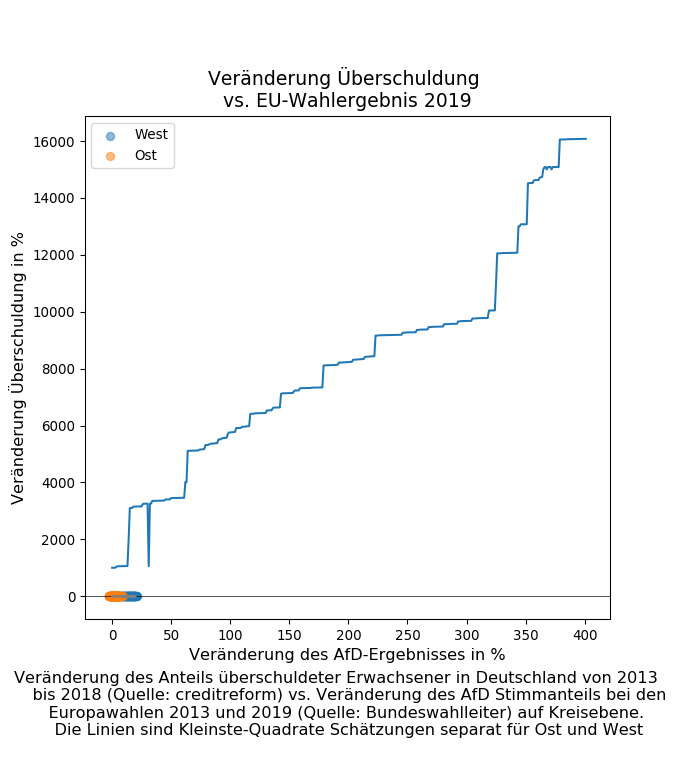

In [91]:
f, (ax2) = plt.subplots(1, 1)#, sharey=True)
#f.figsize=(6,4)
plt.subplots_adjust(top=0.85,bottom=0.2)
language = 'german'# 'eng' or german
if language == 'eng':
    title_left = 'Overindebtedness 2019\nvs. Voteshare'
    ylabel_left = 'Overindebtedness'
    xlabel_left = 'AfD result in %'
    title_right = 'Change in Overindebtedness\nvs. Voteshare'
    ylabel_right = 'Change of Overindebtedness'
    xlabel_right = 'Change of AfD result in %'
    figname = 'figures\\Overindebtedness and AfD-electoral results.png'
    txt = """Change of percentage of overindebted adults in Germany from 2013 to 2018 
    (source: creditreform) against change in AfD's electoral results European 
    Elections 2014 and 2019 in percent (source: Bundeswahlleiter)"""
if language == 'german':
    title_left = 'Überschuldung \nvs. EU-Wahlergebnis 2019'
    ylabel_left = 'Überschuldung'
    xlabel_left = 'AfD-Ergebnis in %'
    title_right = 'Veränderung Überschuldung \nvs. EU-Wahlergebnis 2019'
    ylabel_right = 'Veränderung Überschuldung in %'
    xlabel_right = 'Veränderung des AfD-Ergebnisses in %'
    figname = 'figures\\Überschuldung und AfD Wahlergebnis Europawahl 2019.png'
    txt = """Veränderung des Anteils überschuldeter Erwachsener in Deutschland von 2013 
    bis 2018 (Quelle: creditreform) vs. Veränderung des AfD Stimmanteils bei den
    Europawahlen 2013 und 2019 (Quelle: Bundeswahlleiter) auf Kreisebene. 
    Die Linien sind Kleinste-Quadrate Schätzungen separat für Ost und West"""

#ax1.set_title(title_left)
#ax1.scatter( df.afd_val19,df['2018'],color='black',alpha=0.5)
#ax1.set_ylabel(ylabel_left)
#ax1.set_xlabel(xlabel_left)
fontsize_labels = 12

ax2.set_title(title_right, fontsize = (fontsize_labels+2))
ax2.scatter(df[df.east==1].vot19_14,
            df[df.east==1].ove18_13, label=('West'),alpha=0.5 )
ax2.scatter(df[df.east==0].vot19_14, 
            df[df.east==0].ove18_13, label=('Ost'),alpha=0.5 )
ax2.axhline(color='black',lw=0.5)
ax2.set_ylabel(ylabel_right, fontsize=fontsize_labels)
ax2.set_xlabel(xlabel_right, fontsize=fontsize_labels)
ax2.legend()
#plt.subplots_adjust(wspace=0.4)

f.text(.5, .05, txt, ha='center', fontsize=fontsize_labels)

# resize the figure to match the aspect ratio of the Axes    
f.set_size_inches(7, 8, forward=True)


# estimate slopes
y_west = df[df.east==1].vot19_14
y_east = df[df.east==0].vot19_14
x_west = np.array(df[df.east==1].ove18_13.values).reshape(-1, 1)
x_east = np.array(df[df.east==0].ove18_13.values).reshape(-1, 1)

reg_west = LinearRegression().fit(x_west, y_west)


y_hat_west = reg_west.predict(x_west)

ax2.plot(y_hat_west,x_west,color='grey')

reg_east = LinearRegression().fit(x_east, y_east)

y_hat_east = reg_east.predict(x_east)

ax2.plot(y_hat_east,x_east,color='grey')

In [92]:
print('Score East-Germany: ',reg_east.score(x_east, y_east))
print('Score West-Germany: ',reg_west.score(x_west, y_west))

Score East-Germany:  0.10402299668939365
Score West-Germany:  0.3831140133080897


# Plotting maps

There is some useful information on changes of regions over time (in German) https://www.destatis.de/DE/Themen/Laender-Regionen/Regionales/Gemeindeverzeichnis/_inhalt.html.

<IPython.core.display.Javascript object>


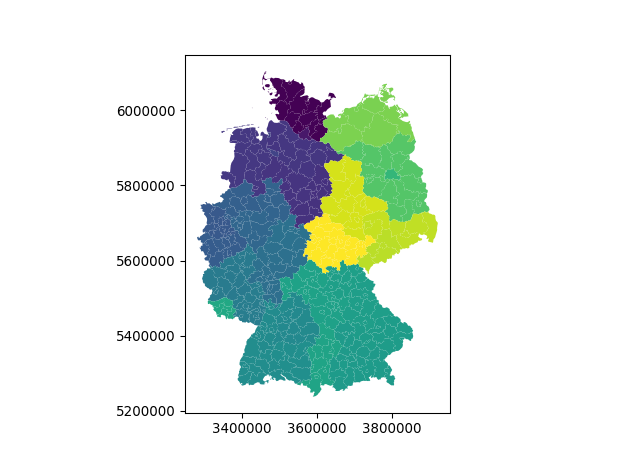

In [100]:
# installing geopandas on a 32-bit, windows machine and python 3.7 was unexpectedly cumbersome. 
# downloading and installing spacely, fiona, gdal, rtree and pyproj wheels and pip installing 
# it worked. As 3.01 didn't work, using 2.4.1, pip install --upgrade setuptools and Microsoft 
# Build Tools for Visual Studio 2019 (https://wiki.python.org/moin/WindowsCompilers)
# the did the trick.
import geopandas
import descartes
from mpl_toolkits.axes_grid1 import make_axes_locatable


df_geo = geopandas.read_file('..\\data\\geodata\\vg2500_krs.shx')
# key for merge with df is RS
df_geo.RS = df_geo.RS.str.replace(r'^0','').astype(int)
df_geo =df_geo.to_crs({'init':'epsg:31467'})
df_geo.plot(column='RS')

In [101]:
# göttingen (3152) and osterode (3156) are now one region
df_geo.RS[df_geo.RS==3156] = 3159
df_geo.RS[df_geo.RS==3152] = 3159
df_geo = df_geo.dissolve(by='RS')

C:\Users\dirku\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\dirku\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [108]:
df.loc[3152]

KeyError: 'the label [3152] is not in the [index]'

In [110]:
df_geo = df_geo.merge(df, left_index=True, right_on='Nr',how='left')
# change projection for "usual" aspect of maps of Germany
df_geo =df_geo.to_crs({'init':'epsg:31467'})

df_geo.head()

geometry  USE        RS_ALT  \
Nr                                                                           
1001  POLYGON ((3531553.308883296 6077192.525540111,...    4  010010000000   
1002  POLYGON ((3577411.381160951 6029439.717821236,...    4  010020000000   
1003  POLYGON ((3624324.72375113 5982346.166191522, ...    4  010030000000   
1004  POLYGON ((3567699.990160487 6000347.042894067,...    4  010040000000   
1051  (POLYGON ((3479614.139790949 5992137.696116768...    4  010510000000   

               GEN     SHAPE_LENG    SHAPE_AREA                region_x  \
Nr                                                                        
1001     Flensburg   32467.034276  5.324899e+07        Flensburg, Stadt   
1002          Kiel   73027.302434  1.218654e+08  Kiel, Landeshauptstadt   
1003        Lübeck  104861.094220  2.211386e+08      Lübeck, Hansestadt   
1004    Neumünster   39858.818376  8.092363e+07       Neumünster, Stadt   
1051  Dithmarschen  202206.675707  1.450311e+09            Dithmarschen   

                   state  eligible_voters_19  eligible_voters_14  \
Nr                                                                 
1001  Schleswig-Holstein             70431.0             70929.0   
1002  Schleswig-Holstein            186195.0            188135.0   
1003  Schleswig-Holstein            166530.0            167198.0   
1004  Schleswig-Holstein             60215.0             60970.0   
1051  Schleswig-Holstein            107045.0            107804.0   

          ...       f_crime_2015  total_suspects_2014  foreign_suspects_2014  \
Nr        ...                                                                  
1001      ...                NaN                  NaN                    NaN   
1002      ...                NaN                  NaN                    NaN   
1003      ...                NaN                  NaN                    NaN   
1004      ...                NaN                  NaN                    NaN   
1051      ...                NaN                  NaN                    NaN   

      f_crime_2014  total_suspects_2013  foreign_suspects_2013  f_crime_2013  \
Nr                                                                             
1001           NaN                  NaN                    NaN           NaN   
1002           NaN                  NaN                    NaN           NaN   
1003           NaN                  NaN                    NaN           NaN   
1004           NaN                  NaN                    NaN           NaN   
1051           NaN                  NaN                    NaN           NaN   

      total_suspects_2012  foreign_suspects_2012  f_crime_2012  
Nr                                                              
1001                  NaN                    NaN           NaN  
1002                  NaN                    NaN           NaN  
1003                  NaN                    NaN           NaN  
1004                  NaN                    NaN           NaN  
1051                  NaN                    NaN           NaN  

[5 rows x 171 columns]

<IPython.core.display.Javascript object>


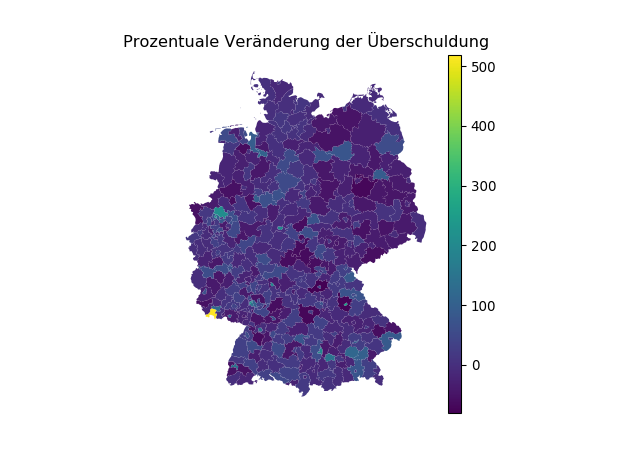

<IPython.core.display.Javascript object>


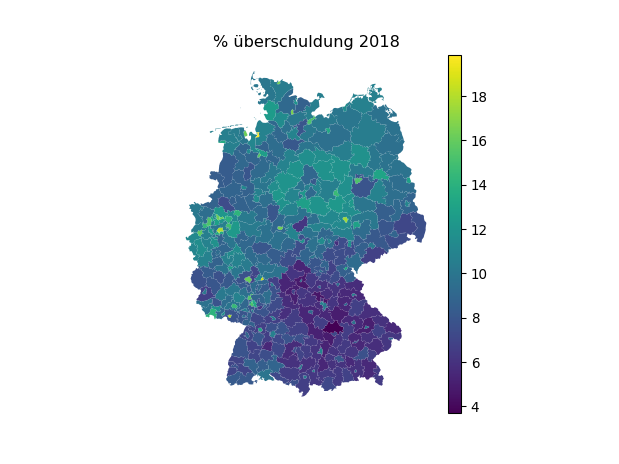

(3248292.344351501, 3953309.37174341, 5194242.9478586465, 6146626.145265488)

In [111]:
fig, (ax1) = plt.subplots(1, 1)

#plot.title()
ax1.title.set_text('Prozentuale Veränderung der Überschuldung')
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.1)
df_geo.plot(column='hartz_total_2018_2013', ax=ax1, legend=True, cax=cax)
ax1.axes.get_xaxis().set_ticks([])
ax1.axes.get_yaxis().set_ticks([])
ax1.axis('off')


fig, (ax2) = plt.subplots(1, 1)
ax2.title.set_text('% überschuldung 2018')
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.1)
df_geo.plot(column='debt_2013', ax=ax2, legend=True, cax=cax)
ax2.axes.get_xaxis().set_ticks([])
ax2.axes.get_yaxis().set_ticks([])
ax2.axis('off')

<IPython.core.display.Javascript object>


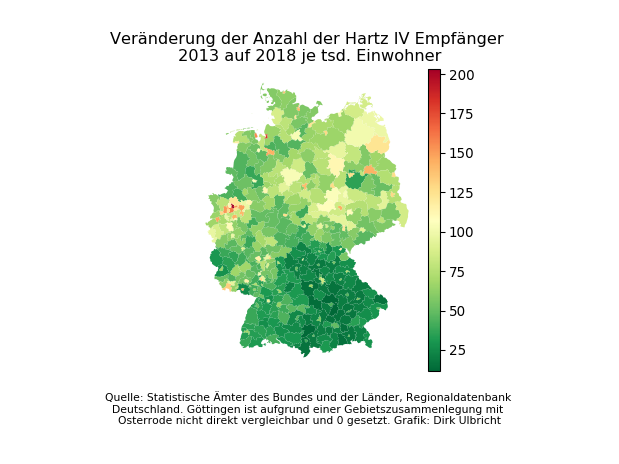

Text(0.5, 0.06, 'Quelle: Statistische Ämter des Bundes und der Länder, Regionaldatenbank \nDeutschland. Göttingen ist aufgrund einer Gebietszusammenlegung mit \nOsterrode nicht direkt vergleichbar und 0 gesetzt. Grafik: Dirk Ulbricht\n')

In [112]:
fig, (ax1) = plt.subplots(1, 1)
plt.subplots_adjust(top=0.85,bottom=0.2)
txt="""Quelle: Statistische Ämter des Bundes und der Länder, Regionaldatenbank 
Deutschland. Göttingen ist aufgrund einer Gebietszusammenlegung mit 
Osterrode nicht direkt vergleichbar und 0 gesetzt. Grafik: Dirk Ulbricht
"""
#plot.title()
ax1.title.set_text('% of overindebted adults\nChange from 2014 to 2018')
ax1.title.set_text('Veränderung der Anzahl der Hartz IV Empfänger\n 2013 auf 2018 je tsd. Einwohner')
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.1)
df_geo.plot(column='hartz_total_2018', ax=ax1, legend=True, cax=cax,cmap='RdYlGn_r')
ax1.axes.get_xaxis().set_ticks([])
ax1.axes.get_yaxis().set_ticks([])
ax1.axis('off')
fig.text(0.5, .06, txt, ha='center', fontsize=8)
# resize the figure to match the aspect ratio of the Axes    
#fig.set_size_inches(7, 8, forward=True)

In [113]:
df.iloc[:,df.columns.str.contains('hartz')].sort_values(by='hartz_total_2018_2013')

hartz_total_2018  hartz_no_empl_2018  hartz_foreign_2018  \
Nr                                                                
9471               18.9                25.1                34.2   
9371               22.6                26.7                37.2   
12069              36.1                23.1                15.2   
9571               15.0                27.4                33.9   
8235               32.0                27.4                41.6   
16063              39.1                23.6                14.7   
16066              41.7                23.8                20.7   
8225               33.1                26.4                35.7   
9271               25.5                26.1                26.9   
16061              40.3                24.5                24.4   
3451               52.1                30.3                31.8   
5515               69.4                29.0                35.1   
6631               43.0                29.1                42.5   
16069              33.8                23.9                17.3   
14521              46.8                20.4                 6.9   
5154               59.7                25.0                29.9   
10042              51.0                27.5                40.4   
5566               52.5                30.5                39.1   
14729              62.5                21.8                10.1   
5754               52.2                29.4                43.2   
13076              66.7                24.0                14.1   
8315               33.7                29.7                40.2   
6431               54.7                28.1                43.8   
9565               44.6                26.3                42.9   
15083              63.9                21.4                12.8   
8215               31.5                27.6                42.9   
9272               16.1                19.6                28.6   
13072              67.4                22.9                11.8   
14627              60.3                22.3                11.0   
8125               34.3                28.5                46.6   
...                 ...                 ...                 ...   
9563               72.2                26.9                43.6   
8135               49.0                29.6                42.2   
9187               19.0                28.0                38.7   
12070              95.9                24.3                15.9   
9479               56.2                25.5                40.1   
5911              124.4                26.9                38.2   
9275               29.0                29.8                39.5   
11000             143.9                27.5                34.1   
3461               80.1                27.7                25.2   
9261               46.5                25.8                45.9   
5711              112.3                28.7                45.3   
9183               34.2                26.2                37.3   
5513              203.1                30.0                41.3   
8222               94.1                27.6                40.1   
4011              144.0                28.9                44.3   
7317              140.9                26.6                27.2   
9177               18.7                31.6                44.4   
10043              95.3                28.2                38.9   
8231               96.1                30.9                50.5   
3401              148.0                27.9                41.2   
8311               68.3                28.7                37.7   
7314              128.1                29.8                46.1   
9179               32.2                31.1                50.6   
9661               75.3                28.3                49.7   
6611              126.1                29.0                47.0   
9761               58.4                25.7                45.6   
5562              123.0                27.4           

<IPython.core.display.Javascript object>


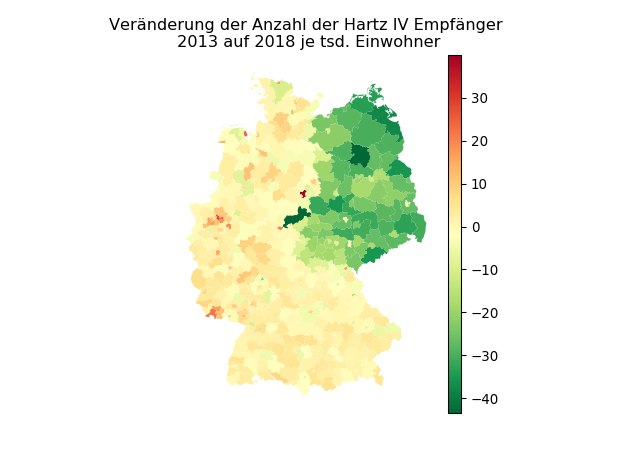

(3248292.344351501, 3953309.37174341, 5194242.9478586465, 6146626.145265488)

In [114]:
fig, (ax1) = plt.subplots(1, 1)

#plot.title()
ax1.title.set_text('% of overindebted adults\nChange from 2013 to 2018')
ax1.title.set_text('Veränderung der Anzahl der Hartz IV Empfänger\n 2013 auf 2018 je tsd. Einwohner')
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.1)
df_geo['Hartz_Veränderung']=(df_geo.hartz_total_2018 - df_geo.hartz_total_2013)
df_geo.plot(column='Hartz_Veränderung', ax=ax1, legend=True, cax=cax,cmap='RdYlGn_r')
ax1.axes.get_xaxis().set_ticks([])
ax1.axes.get_yaxis().set_ticks([])
ax1.axis('off')
